In [1]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-M

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:


df=pd.read_csv("FuelConsumption.csv")

In [5]:


df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
cdf=df[["ENGINESIZE","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

cdf.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


In [8]:

from sklearn.model_selection import train_test_split

In [9]:

train, test=train_test_split(df,test_size=0.2)

In [10]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [13]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)
     

In [17]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[  1.      5.4    29.16  157.464]
 [  1.      3.6    12.96   46.656]
 [  1.      1.6     2.56    4.096]
 ...
 [  1.      3.      9.     27.   ]
 [  1.      2.4     5.76   13.824]
 [  1.      5.     25.    125.   ]]


In [15]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [18]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         28.67675601  4.46040467 -0.50356912]]
Intercept: [130.38203532]


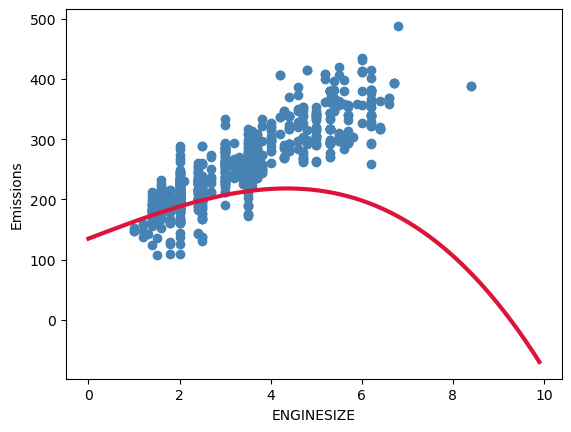

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2]  + clf.coef_[0][3] * np.power(XX, 3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [20]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[134.84244    137.70961203 140.57376265 143.43187043 146.28091398
 149.11787186 151.93972267 154.743445   157.52601742 160.28441852
 163.01562689 165.71662111 168.38437977 171.01588145 173.60810474
 176.15802823 178.6626305  181.11889012 183.5237857  185.87429582
 188.16739905 190.40007399 192.56929922 194.67205333 196.7053149
 198.66606251 200.55127476 202.35793022 204.08300749 205.72348514
 207.27634177 208.73855595 210.10710628 211.37897134 212.55112971
 213.62055998 214.58424074 215.43915056 216.18226804 216.81057176
 217.32104031 217.71065227 217.97638622 218.11522076 218.12413446
